# Problem Statement


Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. The Data team wants to build intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind # T-test for independent samples

# UDF

In [2]:
def dist_check(df, col_name):
  print("Unique values : ", df[col_name].unique())
  print("Value counts : ")
  print(df[col_name].value_counts())

In [3]:
def state_name_format(xx):
    xx=str(xx)
    xx = xx.replace('(',"")
    xx = xx.replace(')',"")
    return xx

# Reading the Data

In [4]:
df = pd.read_excel('Delhivery_data.xlsx')
df.sample(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
133194,training,2018-09-19 02:54:51.603,thanos::sroute:c169504b-1d9c-420a-ab80-e7d96c0...,Carting,trip-153732569160282809,IND786001AAB,Dibrugarh_Bokule_H (Assam),IND786125AAA,Tinusukia_Chrwpaty_D (Assam),2018-09-19 02:54:51.603,...,2018-09-19 04:13:55.000,28.177344,56,22,31.9621,2.545455,16,7,10.7136,2.285714
16648,test,2018-09-27 03:55:30.324,thanos::sroute:d44a95bc-1d78-49aa-a987-ea5763a...,FTL,trip-153802053032411379,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-27 03:55:30.324,...,2018-09-28 14:50:06.000,44.464589,55,40,47.2912,1.375000,21,8,12.6187,2.625000
18185,training,2018-09-18 15:34:31.125,thanos::sroute:c0cd085b-b960-4797-b5ea-43eff7d...,FTL,trip-153728487112522017,IND683511AAA,Aluva_Peedika_H (Kerala),IND680104AAA,Guruvayoor_ManhrBld_D (Kerala),2018-09-18 15:34:31.125,...,2018-09-18 23:27:17.000,45.377432,72,55,51.5741,1.309091,28,26,24.3187,1.076923
144679,training,2018-09-26 02:58:47.341,thanos::sroute:872d9762-5527-44ee-9fc9-4457999...,Carting,trip-153793072734029171,IND606201AAC,Chinnasalem_VkotRoad_D (Tamil Nadu),IND605601AAA,Villupuram_Thirumtr_IP (Tamil Nadu),2018-09-26 08:03:55.109,...,2018-09-26 09:37:25.000,36.636305,55,35,45.9838,1.571429,24,12,16.6228,2.000000
41800,test,2018-09-29 21:34:20.149,thanos::sroute:20f7c97f-614d-4501-96c7-fbd43d5...,Carting,trip-153825686014851724,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND122001AAA,GGN_DPC (Haryana),2018-09-29 21:34:20.149,...,2018-09-29 22:44:29.000,9.030399,12,11,10.5753,1.090909,12,11,10.5753,1.090909
23267,training,2018-09-15 22:22:53.820,thanos::sroute:510efc7a-31af-4c0b-8020-827c7e0...,FTL,trip-153705017381930907,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-15 22:22:53.820,...,2018-09-16 00:48:25.000,198.131204,323,180,236.1554,1.794444,23,15,22.5804,1.533333
122098,training,2018-09-25 07:31:33.193,thanos::sroute:918d3f88-371e-4cc6-b080-6f9c92e...,Carting,trip-153786069319272437,IND122001AAD,Gurgaon_Kadipur (Haryana),IND122050AAA,Gurgaon_Manesar (Haryana),2018-09-25 08:37:33.266,...,2018-09-25 08:37:33.266,9.317386,68,17,13.4434,4.000000,68,17,13.4434,4.000000
4897,training,2018-09-19 05:29:26.854,thanos::sroute:dca6268f-741a-4d1a-b1b0-aab1309...,FTL,trip-153733496685379517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-19 05:29:26.854,...,2018-09-21 00:43:21.000,264.699080,394,251,302.2001,1.569721,23,17,24.3966,1.352941
107087,training,2018-09-23 13:21:09.672,thanos::sroute:aa5fea4d-666c-4d4d-a4d0-6a1a7fd...,Carting,trip-153770886967154717,IND829121AAA,Peterbar_GagiDPP_D (Jharkhand),IND834002AAB,Ranchi_Hub (Jharkhand),2018-09-24 05:01:41.894,...,2018-09-24 05:11:36.000,56.773120,337,63,86.3853,5.349206,7,8,12.5923,0.875000
85132,training,2018-09-13 02:57:26.716,thanos::sroute:eb85f870-c72a-4a27-8a9f-c806469...,FTL,trip-153680744671578239,IND403702AAA,Canacona_CharRsta_D (Goa),IND575004AAB,Mangalore_Kuntikna_H (Karnataka),2018-09-13 05:27:05.265,...,2018-09-13 10:49:27.000,89.562457,180,83,101.7578,2.168675,40,18,25.1705,2.222222


# EDA

In [5]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

## Shape of the dataset

In [6]:
# Shape of the dataset -
print("No. of rows : ", df.shape[0])

No. of rows :  144867


## data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [8]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


### Checking & Handling For Null Value

In [9]:
# Checking for null values -
(df.isna().sum() / len(df)) * 100 
#only two columns have null values namely source_name & destination_name
#We can remove these two columns and alternatively use source_center & destination_center

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

### Checking For duplicates

In [10]:
# Checking for duplicate rows -
dup_rows = df[df.duplicated()]
print("No. of duplicate rows: ", dup_rows.shape[0])

No. of duplicate rows:  0


### Convert timestamp column to pandas datetime

In [11]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time']= pd.to_datetime(df['od_start_time'])
df['od_end_time']= pd.to_datetime(df['od_end_time'])


### Checking Maximum & Minimum of all important timestamps

In [12]:
df['trip_creation_time'].max(),df['od_start_time'].max(),df['od_end_time'].max()

(Timestamp('2018-10-03 23:59:42.702000'),
 Timestamp('2018-10-06 04:27:23.392000'),
 Timestamp('2018-10-08 03:00:24.353000'))

In [13]:
df['trip_creation_time'].min(),df['od_start_time'].min(),df['od_end_time'].min() # Contains ~one month of data

(Timestamp('2018-09-12 00:00:16.536000'),
 Timestamp('2018-09-12 00:00:16.536000'),
 Timestamp('2018-09-12 00:50:10.814000'))

### Checking Distribution of Categorical columns

In [14]:
col_list = ['data','route_type']
for col in col_list: 
  print(col, " -")
  dist_check(df, col)
  print("\n")

data  -
Unique values :  ['training' 'test']
Value counts : 
training    104858
test         40009
Name: data, dtype: int64


route_type  -
Unique values :  ['Carting' 'FTL']
Value counts : 
FTL        99660
Carting    45207
Name: route_type, dtype: int64




### Relationship Between Route type & Trip uid

In [15]:
rtype_count_chk = df[['trip_uuid','route_type']].groupby('trip_uuid')['route_type'].nunique().reset_index()
rtype_count_chk['route_type'].max()

1

# Data Preparation (Includes Feature Creation & Merging of rows and aggregation of fields)

In [16]:
df = df[['trip_creation_time','route_type','trip_uuid','source_center','source_name',\
    'destination_center','destination_name','od_start_time','od_end_time','actual_time',\
    'segment_actual_time','start_scan_to_end_scan',\
    'actual_distance_to_destination','osrm_time','osrm_distance',\
    'segment_osrm_time','segment_osrm_distance']]\
.sort_values(by=['trip_uuid','trip_creation_time'], ascending=[False,False]).reset_index(drop=True)

In [17]:
df['Year'] = df['trip_creation_time'].dt.year
df['Month'] = df['trip_creation_time'].dt.month

In [18]:
df['source_city_place_code'] = df['source_name'].str.split(" ", n=1, expand=True)[0]
df['source_state'] = df['source_name'].str.split(" ", n=1, expand=True)[1]
df['source_city'] = df['source_city_place_code'].str.split("_", n=1, expand=True)[0]
df['source_place_code'] = df['source_city_place_code'].str.split("_", n=1, expand=True)[1]
df['source_state']  = df['source_state'].map(state_name_format)
df

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,actual_time,...,osrm_time,osrm_distance,segment_osrm_time,segment_osrm_distance,Year,Month,source_city_place_code,source_state,source_city,source_place_code
0,2018-10-03 23:59:42.702,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.713,2018-10-04 03:58:40.727,30,...,21,23.2367,21,23.2367,2018,10,Hospet,Karnataka,Hospet,None
1,2018-10-03 23:59:42.702,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.713,2018-10-04 03:58:40.727,42,...,26,28.0484,4,4.8117,2018,10,Hospet,Karnataka,Hospet,None
2,2018-10-03 23:59:42.702,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.727,2018-10-04 08:46:09.167,45,...,17,23.9866,17,23.9866,2018,10,Sandur_WrdN1DPP_D,Karnataka,Sandur,WrdN1DPP_D
3,2018-10-03 23:59:42.702,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.727,2018-10-04 08:46:09.167,233,...,42,52.5303,25,28.5437,2018,10,Sandur_WrdN1DPP_D,Karnataka,Sandur,WrdN1DPP_D
4,2018-10-03 23:59:14.391,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628801AAA,Eral_Busstand_D (Tamil Nadu),2018-10-03 23:59:14.391,2018-10-04 01:44:53.808,18,...,13,11.9050,13,11.9050,2018,10,Tirunelveli_VdkkuSrt_I,Tamil Nadu,Tirunelveli,VdkkuSrt_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,2018-09-12 00:00:16.536,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858,2018-09-13 13:40:23.124,590,...,266,356.8964,18,25.5036,2018,9,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central_H_6
144863,2018-09-12 00:00:16.536,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858,2018-09-13 13:40:23.124,612,...,298,402.6963,35,49.5637,2018,9,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central_H_6
144864,2018-09-12 00:00:16.536,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858,2018-09-13 13:40:23.124,674,...,349,437.7819,70,61.1885,2018,9,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central_H_6
144865,2018-09-12 00:00:16.536,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858,2018-09-13 13:40:23.124,712,...,318,431.4803,36,50.1816,2018,9,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central_H_6


In [19]:
df['destination_city_place_code'] = df['destination_name'].str.split(" ", n=1, expand=True)[0]
df['destination_state'] = df['destination_name'].str.split(" ", n=1, expand=True)[1]
df['destination_city'] = df['destination_city_place_code'].str.split("_", n=1, expand=True)[0]
df['destination_place_code'] = df['destination_city_place_code'].str.split("_", n=1, expand=True)[1]
df['destination_state']  = df['destination_state'].map(state_name_format)
df

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,actual_time,...,Year,Month,source_city_place_code,source_state,source_city,source_place_code,destination_city_place_code,destination_state,destination_city,destination_place_code
0,2018-10-03 23:59:42.702,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.713,2018-10-04 03:58:40.727,30,...,2018,10,Hospet,Karnataka,Hospet,None,Sandur_WrdN1DPP_D,Karnataka,Sandur,WrdN1DPP_D
1,2018-10-03 23:59:42.702,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.713,2018-10-04 03:58:40.727,42,...,2018,10,Hospet,Karnataka,Hospet,None,Sandur_WrdN1DPP_D,Karnataka,Sandur,WrdN1DPP_D
2,2018-10-03 23:59:42.702,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.727,2018-10-04 08:46:09.167,45,...,2018,10,Sandur_WrdN1DPP_D,Karnataka,Sandur,WrdN1DPP_D,Bellary_Dc,Karnataka,Bellary,Dc
3,2018-10-03 23:59:42.702,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.727,2018-10-04 08:46:09.167,233,...,2018,10,Sandur_WrdN1DPP_D,Karnataka,Sandur,WrdN1DPP_D,Bellary_Dc,Karnataka,Bellary,Dc
4,2018-10-03 23:59:14.391,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628801AAA,Eral_Busstand_D (Tamil Nadu),2018-10-03 23:59:14.391,2018-10-04 01:44:53.808,18,...,2018,10,Tirunelveli_VdkkuSrt_I,Tamil Nadu,Tirunelveli,VdkkuSrt_I,Eral_Busstand_D,Tamil Nadu,Eral,Busstand_D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,2018-09-12 00:00:16.536,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858,2018-09-13 13:40:23.124,590,...,2018,9,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB
144863,2018-09-12 00:00:16.536,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858,2018-09-13 13:40:23.124,612,...,2018,9,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB
144864,2018-09-12 00:00:16.536,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858,2018-09-13 13:40:23.124,674,...,2018,9,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB
144865,2018-09-12 00:00:16.536,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858,2018-09-13 13:40:23.124,712,...,2018,9,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB


In [20]:
df['time_taken'] = (df['od_end_time'] - df['od_start_time'])/pd.Timedelta(minutes=1)
df['time_taken']

0           66.933567
1           66.933567
2          287.474000
3          287.474000
4          105.656950
             ...     
144862    1260.604433
144863    1260.604433
144864    1260.604433
144865    1260.604433
144866    1260.604433
Name: time_taken, Length: 144867, dtype: float64

In [21]:
df[df['trip_uuid'] =='trip-153671041653548748'].T

,144828,144829,144830,144831,144832,144833,144834,144835,144836,144837,...,144857,144858,144859,144860,144861,144862,144863,144864,144865,144866
trip_creation_time,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,...,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000
route_type,FTL,FTL,FTL,FTL,FTL,FTL,FTL,FTL,FTL,FTL,...,FTL,FTL,FTL,FTL,FTL,FTL,FTL,FTL,FTL,FTL
trip_uuid,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,...,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748,trip-153671041653548748
source_center,IND462022AAA,IND462022AAA,IND462022AAA,IND462022AAA,IND462022AAA,IND462022AAA,IND462022AAA,IND462022AAA,IND462022AAA,IND462022AAA,...,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA
source_name,Bhopal_Trnsport_H (Madhya Pradesh),Bhopal_Trnsport_H (Madhya Pradesh),Bhopal_Trnsport_H (Madhya Pradesh),Bhopal_Trnsport_H (Madhya Pradesh),Bhopal_Trnsport_H (Madhya Pradesh),Bhopal_Trnsport_H (Madhya Pradesh),Bhopal_Trnsport_H (Madhya Pradesh),Bhopal_Trnsport_H (Madhya Pradesh),Bhopal_Trnsport_H (Madhya Pradesh),Bhopal_Trnsport_H (Madhya Pradesh),...,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh)
destination_center,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,IND209304AAA,...,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB,IND000000ACB
destination_name,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),...,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana)
od_start_time,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,2018-09-12 00:00:16.536000,...,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000
od_end_time,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858000,2018-09-12 16:39:46.858

In [22]:
df[df['trip_uuid'] =='trip-153861118270144424'].T

,0,1,2,3
trip_creation_time,2018-10-03 23:59:42.702000,2018-10-03 23:59:42.702000,2018-10-03 23:59:42.702000,2018-10-03 23:59:42.702000
route_type,FTL,FTL,FTL,FTL
trip_uuid,trip-153861118270144424,trip-153861118270144424,trip-153861118270144424,trip-153861118270144424
source_center,IND583201AAA,IND583201AAA,IND583119AAA,IND583119AAA
source_name,Hospet (Karnataka),Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),Sandur_WrdN1DPP_D (Karnataka)
destination_center,IND583119AAA,IND583119AAA,IND583101AAA,IND583101AAA
destination_name,Sandur_WrdN1DPP_D (Karnataka),Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),Bellary_Dc (Karnataka)
od_start_time,2018-10-04 02:51:44.713000,2018-10-04 02:51:44.713000,2018-10-04 03:58:40.727000,2018-10-04 03:58:40.727000
od_end_time,2018-10-04 03:58:40.727000,2018-10-04 03:58:40.727000,2018-10-04 08:46:09.167000,2018-10-04 08:46:09.167000
actual_time,30,42,45,233


In [23]:
df_agg = df.groupby(['trip_uuid','Year','Month','source_center','destination_center','route_type','source_state','source_city',\
            'source_place_code','destination_state','destination_city','destination_place_code']).agg({'actual_time':'max',
                                       'segment_actual_time': 'sum',
                                        'start_scan_to_end_scan':'last',
                                       'actual_distance_to_destination':'sum',
                                       'osrm_time':'max',
                                       'osrm_distance':'max',
                                       'segment_osrm_time':'sum',
                                       'segment_osrm_distance':'sum',
                                        'od_start_time':'first',                                                               
                                       'time_taken':'last'}).reset_index()
df_agg = df_agg.sort_values(by=['trip_uuid','od_start_time'], ascending=True)
df_agg

,trip_uuid,Year,Month,source_center,destination_center,route_type,source_state,source_city,source_place_code,destination_state,...,actual_time,segment_actual_time,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_osrm_time,segment_osrm_distance,od_start_time,time_taken
1,trip-153671041653548748,2018,9,IND462022AAA,IND209304AAA,FTL,Madhya Pradesh,Bhopal,Trnsport_H,Uttar Pradesh,...,830,820,999,5082.046634,394,544.8027,474,649.8528,2018-09-12 00:00:16.536,999.505367
0,trip-153671041653548748,2018,9,IND209304AAA,IND000000ACB,FTL,Uttar Pradesh,Kanpur,Central_H_6,Haryana,...,732,728,1260,3778.765471,349,446.5496,534,670.6205,2018-09-12 16:39:46.858,1260.604433
3,trip-153671042288605164,2018,9,IND572101AAA,IND561203AAB,Carting,Karnataka,Tumkur,Veersagr_I,Karnataka,...,96,95,122,186.897974,42,56.9116,39,55.9899,2018-09-12 00:00:22.886,122.779500
2,trip-153671042288605164,2018,9,IND561203AAB,IND562101AAA,Carting,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,...,47,46,58,53.310332,26,28.1994,26,28.1995,2018-09-12 02:03:09.656,58.832383
5,trip-153671043369099517,2018,9,IND562132AAA,IND000000ACB,FTL,Karnataka,Bangalore,Nelmngla_H,Haryana,...,2736,2700,3099,66437.911988,1529,2090.8743,1710,2227.5270,2018-09-12 00:00:33.691,3099.723600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24413,trip-153861115439069069,2018,10,IND628801AAA,IND628204AAA,Carting,Tamil Nadu,Eral,Busstand_D,Tamil Nadu,...,30,29,44,21.672374,14,16.0185,14,16.0184,2018-10-04 01:44:53.808,44.174400
24411,trip-153861115439069069,2018,10,IND628204AAA,IND627657AAA,Carting,Tamil Nadu,Tirchchndr,Shnmgprm_D,Tamil Nadu,...,51,49,62,88.326510,41,42.5213,42,42.1431,2018-10-04 02:29:04.272,62.115200
24410,trip-153861115439069069,2018,10,IND627657AAA,IND628613AAA,Carting,Tamil Nadu,Thisayanvilai,UdnkdiRD_D,Tamil Nadu,...,33,32,45,26.868589,31,25.7087,30,25.7087,2018-10-04 03:31:11.184,45.478517
24412,trip-153861115439069069,2018,10,IND628613AAA,IND627005AAA,Carting,Tamil Nadu,Peikulam,SriVnktpm_D,Tamil Nadu,...,90,89,91,90.049767,48,40.6080,77,78.5869,2018-10-04 04:16:39.895,91.087800


In [24]:
df_agg = df_agg.sort_values(by=['trip_uuid','od_start_time'], ascending=True)
df_agg

,trip_uuid,Year,Month,source_center,destination_center,route_type,source_state,source_city,source_place_code,destination_state,...,actual_time,segment_actual_time,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_osrm_time,segment_osrm_distance,od_start_time,time_taken
1,trip-153671041653548748,2018,9,IND462022AAA,IND209304AAA,FTL,Madhya Pradesh,Bhopal,Trnsport_H,Uttar Pradesh,...,830,820,999,5082.046634,394,544.8027,474,649.8528,2018-09-12 00:00:16.536,999.505367
0,trip-153671041653548748,2018,9,IND209304AAA,IND000000ACB,FTL,Uttar Pradesh,Kanpur,Central_H_6,Haryana,...,732,728,1260,3778.765471,349,446.5496,534,670.6205,2018-09-12 16:39:46.858,1260.604433
3,trip-153671042288605164,2018,9,IND572101AAA,IND561203AAB,Carting,Karnataka,Tumkur,Veersagr_I,Karnataka,...,96,95,122,186.897974,42,56.9116,39,55.9899,2018-09-12 00:00:22.886,122.779500
2,trip-153671042288605164,2018,9,IND561203AAB,IND562101AAA,Carting,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,...,47,46,58,53.310332,26,28.1994,26,28.1995,2018-09-12 02:03:09.656,58.832383
5,trip-153671043369099517,2018,9,IND562132AAA,IND000000ACB,FTL,Karnataka,Bangalore,Nelmngla_H,Haryana,...,2736,2700,3099,66437.911988,1529,2090.8743,1710,2227.5270,2018-09-12 00:00:33.691,3099.723600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24413,trip-153861115439069069,2018,10,IND628801AAA,IND628204AAA,Carting,Tamil Nadu,Eral,Busstand_D,Tamil Nadu,...,30,29,44,21.672374,14,16.0185,14,16.0184,2018-10-04 01:44:53.808,44.174400
24411,trip-153861115439069069,2018,10,IND628204AAA,IND627657AAA,Carting,Tamil Nadu,Tirchchndr,Shnmgprm_D,Tamil Nadu,...,51,49,62,88.326510,41,42.5213,42,42.1431,2018-10-04 02:29:04.272,62.115200
24410,trip-153861115439069069,2018,10,IND627657AAA,IND628613AAA,Carting,Tamil Nadu,Thisayanvilai,UdnkdiRD_D,Tamil Nadu,...,33,32,45,26.868589,31,25.7087,30,25.7087,2018-10-04 03:31:11.184,45.478517
24412,trip-153861115439069069,2018,10,IND628613AAA,IND627005AAA,Carting,Tamil Nadu,Peikulam,SriVnktpm_D,Tamil Nadu,...,90,89,91,90.049767,48,40.6080,77,78.5869,2018-10-04 04:16:39.895,91.087800


In [25]:
df_agg[df_agg['trip_uuid']=='trip-153671041653548748']['time_taken'].sum()

2260.1098

In [26]:
df_agg_f = df_agg.groupby(['trip_uuid','Year','Month','route_type']).agg({
                                        'source_center':'first',
                                        'destination_center': 'last',
                                         'source_state': 'first',
                                        'source_city':'first',
                                         'source_place_code':'first',
                                         'destination_state':'last',
                                         'destination_city':'last',
                                        'destination_place_code':'last',
                                        'actual_time':'sum',
                                       'segment_actual_time': 'sum',
                                        'start_scan_to_end_scan':'sum',
                                       'actual_distance_to_destination':'sum',
                                       'osrm_time':'sum',
                                       'osrm_distance':'sum',
                                       'segment_osrm_time':'sum',
                                       'segment_osrm_distance':'sum',
                                       'time_taken':'sum'}).reset_index()
df_agg_f

,trip_uuid,Year,Month,route_type,source_center,destination_center,source_state,source_city,source_place_code,destination_state,...,destination_place_code,actual_time,segment_actual_time,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_osrm_time,segment_osrm_distance,time_taken
0,trip-153671041653548748,2018,9,FTL,IND462022AAA,IND000000ACB,Madhya Pradesh,Bhopal,Trnsport_H,Haryana,...,Bilaspur_HB,1562,1548,2259,8860.812105,743,991.3523,1008,1320.4733,2260.109800
1,trip-153671042288605164,2018,9,Carting,IND572101AAA,IND562101AAA,Karnataka,Tumkur,Veersagr_I,Karnataka,...,ShntiSgr_D,143,141,180,240.208306,68,85.1110,65,84.1894,181.611883
2,trip-153671043369099517,2018,9,FTL,IND562132AAA,IND160002AAC,Karnataka,Bangalore,Nelmngla_H,Punjab,...,Mehmdpur_H,3347,3308,3933,68163.502238,1741,2372.0852,1941,2545.2678,3934.362517
3,trip-153671052974046625,2018,9,FTL,IND583119AAA,IND583101AAA,Karnataka,Sandur,WrdN1DPP_D,Karnataka,...,Dc,131,130,485,63.783978,44,53.5761,44,53.5761,485.792817
4,trip-153671055416136166,2018,9,Carting,IND600116AAB,IND602105AAB,Tamil Nadu,Chennai,Porur_DPC,Tamil Nadu,...,Sriperumbudur_Dc,61,60,189,34.407865,23,28.0647,23,28.0647,190.487850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13540,trip-153861095625827784,2018,10,Carting,IND160002AAC,IND160002AAC,Punjab,Chandigarh,Mehmdpur_H,Punjab,...,Mehmdpur_H,83,82,257,141.057373,62,73.4630,62,64.8551,258.028917
13541,trip-153861104386292051,2018,10,Carting,IND121004AAB,IND121004AAA,Haryana,FBD,Balabhgarh_DPC,Haryana,...,Blbgarh_DC,21,21,60,25.130640,12,16.0882,11,16.0883,60.590517
13542,trip-153861106442901555,2018,10,Carting,IND209304AAA,IND209304AAA,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,...,Central_H_6,282,281,421,93.743842,54,63.2841,88,104.8866,422.119867
13543,trip-153861115439069069,2018,10,Carting,IND627005AAA,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt_I,Tamil Nadu,...,VdkkuSrt_I,264,258,347,355.281673,184,177.6635,221,223.5324,348.512867


In [27]:
df_agg_f.isna().sum()

trip_uuid                         0
Year                              0
Month                             0
route_type                        0
source_center                     0
destination_center                0
source_state                      0
source_city                       0
source_place_code                 0
destination_state                 0
destination_city                  0
destination_place_code            0
actual_time                       0
segment_actual_time               0
start_scan_to_end_scan            0
actual_distance_to_destination    0
osrm_time                         0
osrm_distance                     0
segment_osrm_time                 0
segment_osrm_distance             0
time_taken                        0
dtype: int64

In [28]:
df_agg_f['source_state'].value_counts() #Karnataka, Maharashtra and Haryana are top three states for source

Karnataka                  2039
Maharashtra                1930
Haryana                    1569
Tamil Nadu                 1042
Telangana                   781
Delhi                       755
Gujarat                     736
Uttar Pradesh               671
West Bengal                 655
Punjab                      608
Rajasthan                   456
Andhra Pradesh              399
Bihar                       355
Kerala                      289
Madhya Pradesh              266
Assam                       263
Jharkhand                   160
Orissa                      107
Uttarakhand                  90
Goa                          56
Chandigarh                   47
Chhattisgarh                 43
Himachal Pradesh             34
02_DPC Uttar Pradesh         32
City Madhya Pradesh          26
Road Punjab                  18
Jammu & Kashmir              17
Mandakni Madhya Pradesh      16
Alipore_DPC West Bengal      16
West _Dc Maharashtra         15
Dadra and Nagar Haveli       15
Pondiche

In [29]:
df_agg_f['destination_state'].value_counts() #Karnataka, Maharashtra and Haryana are top three states for destination

Karnataka                  2088
Maharashtra                1829
Haryana                    1515
Tamil Nadu                 1029
Telangana                   843
Gujarat                     736
Punjab                      689
West Bengal                 652
Delhi                       639
Uttar Pradesh               637
Rajasthan                   504
Andhra Pradesh              400
Bihar                       360
Madhya Pradesh              301
Kerala                      273
Assam                       233
Jharkhand                   168
Orissa                      119
Uttarakhand                 105
02_DPC Uttar Pradesh         88
Goa                          56
Chhattisgarh                 43
Himachal Pradesh             40
Avenue_DPC West Bengal       31
Chandigarh                   28
West _Dc Maharashtra         25
Alipore_DPC West Bengal      25
Arunachal Pradesh            23
Dadra and Nagar Haveli       17
Jammu & Kashmir              15
Pondicherry                  10
Nagar Ut

# Relationship Between Variables

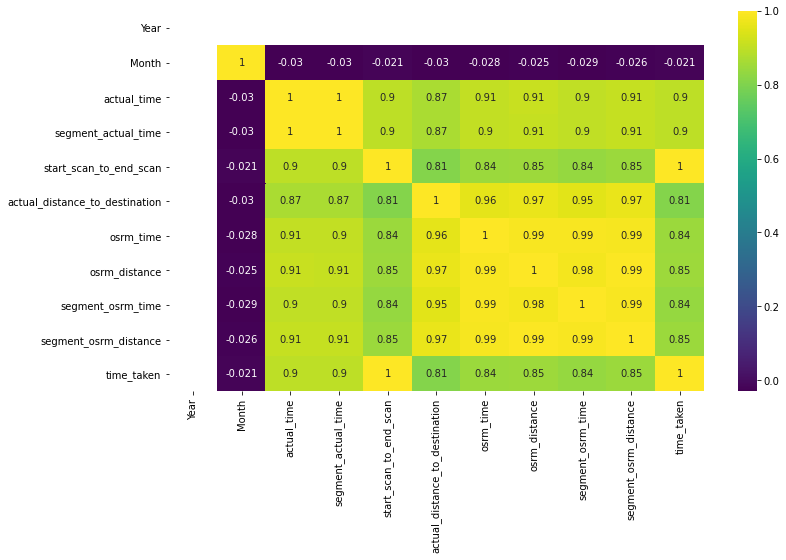

In [29]:
# Correlation Heatmap -

plt.figure(figsize=(12, 7))
sbn.heatmap(df_agg_f.corr(method='spearman'), 
            annot=True, cmap='viridis')
plt.show()

In [30]:
# fig = plt.figure(figsize =(10, 7))
 
# # Creating plot
# plt.boxplot(data)
 
# # show plot
# plt.show()

In [31]:
# Outlier Detection using Boxplots -

# sbn.set(style="whitegrid")
# fig = plt.figure(figsize=(8, 25))
# fig.subplots_adjust(right=1.5)

# for plot in range(1, len(col_list)+1):
#     plt.subplot(5, 2, plot)
#     sbn.boxplot(x=dfn[col_list[plot-1]], y=dfn['count'])

# plt.show()

In [32]:
# # 3. 
# # Outlier Treatment using IQR (not needed but, we can do it) -

# q1 = dfn['count'].quantile(0.25)
# q3 = dfn['count'].quantile(0.75)
# iqr = q3-q1

# dfn = dfn[(dfn['count']>(q1-1.5*iqr) ) & (dfn['count']<(q3+1.5*iqr))]

# print("No. of rows : ", dfn.shape[0])

In [33]:
df_agg_f.columns


Index(['trip_uuid', 'Year', 'Month', 'route_type', 'source_center',
       'destination_center', 'source_state', 'source_city',
       'source_place_code', 'destination_state', 'destination_city',
       'destination_place_code', 'actual_time', 'segment_actual_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination', 'osrm_time',
       'osrm_distance', 'segment_osrm_time', 'segment_osrm_distance',
       'time_taken'],
      dtype='object')

## Hypothesis Testing

### Ques. 1 - Is there any significant difference between the "start_scan_to_end_scan & time_taken (od_end_time-od_start_time)"

In [73]:
df_agg_f['start_scan_to_end_scan'].mean()

556.175415282392

In [38]:
df_agg_f['time_taken'].mean()

557.0736997883607

#### Step 1: Define the null and alternate hypothesis




𝐻0:
 The time taken between od_start_time and od_end_time is similar to the start scan to end scan time.

𝐻𝑎:
 The time taken between od_start_time and od_end_time is not similar to the start scan to end scan time.

Let 𝜇1
 
 be the average of time taken between od_start_time and od_end_time
 and 𝜇2
be the average of start scan to end scan time
Mathematically, the above formulated hypothesis can be written as:

𝐻0:𝜇1=𝜇2

𝐻𝑎:𝜇1!=𝜇2

Ques. What is the difference between a t-test and a z-test?

Ans.

A t-test looks at two sets of data that are different from each other, with no standard deviation or variance.

A z-test views the averages of data sets that are different from each other but have the standard deviation or variance given.

The t test as compared with z test has its advantage for small sample comparison. As n increases, t approaches to z. The advantage of t test disappears, and t distribution simply becomes z distribution.

In other words, with large n, t test is just close to z test and one doen't lose anything to continue to use t test.

In the past, for convenience, we use z table when n > 30. We don't have to do it anymore.

In fact, all statistical packages use t test even n is large. This is easy, convenience with computer programming, and is correct. All statistical packages are good references.

#### **Step 2:** Select an appropriate test

Note that the standard deviation of the population is not known

In [79]:
sstes = df_agg_f['start_scan_to_end_scan']
tt = df_agg_f['time_taken']

In [80]:
print('The sample standard deviation of the start scan to end scan is:', round(sstes.std(), 2))
print('The sample standard deviation of the time taken is:', round(tt.std(), 2))

The sample standard deviation of the start scan to end scan is: 674.31
The sample standard deviation of the time taken is: 674.46


As the sample standard deviations are different, the population standard deviations can be assumed to be different.

This is a two-tailed test concerning two population means from two independent populations.
As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

#### **Step 3:** Decide the significance level

In [81]:
alpha = 0.05 # Taking the most commonly used significance level

#### **Step 4:** Calculate the p-value

In [82]:
def result(p_value, alpha):
  if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
  else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

In [83]:
test_stat, p_value = ttest_ind(tt, sstes, equal_var=False, alternative='two-sided')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.9127135666551001
As the p-value 0.9127135666551001 is greater than the level of significance, we fail to reject the null hypothesis.


### Ques. 2 - Is there any significant difference between the " actual_time & OSRM time"

In [50]:
df_agg_f['actual_time'].mean()

378.28519748984866

In [51]:
df_agg_f['osrm_time'].mean()

172.4640826873385

#### Step 1: Define the null and alternate hypothesis



𝐻0:
 The actual_time taken is similar to the OSRM time.

𝐻𝑎:
 The actual_time taken is not similar to the OSRM time.

Let 𝜇1
 
 be the average of actual_time taken
 and 𝜇2
be the average of OSRM time.
Mathematically, the above formulated hypothesis can be written as:

𝐻0:𝜇1=𝜇2

𝐻𝑎:𝜇1!=𝜇2

Ques. What is the difference between a t-test and a z-test?

Ans.

A t-test looks at two sets of data that are different from each other, with no standard deviation or variance.

A z-test views the averages of data sets that are different from each other but have the standard deviation or variance given.

The t test as compared with z test has its advantage for small sample comparison. As n increases, t approaches to z. The advantage of t test disappears, and t distribution simply becomes z distribution.

In other words, with large n, t test is just close to z test and one doen't lose anything to continue to use t test.

In the past, for convenience, we use z table when n > 30. We don't have to do it anymore.

In fact, all statistical packages use t test even n is large. This is easy, convenience with computer programming, and is correct. All statistical packages are good references.

#### **Step 2:** Select an appropriate test

Note that the standard deviation of the population is not known

In [84]:
actual_time = df_agg_f['actual_time']
osrm_time = df_agg_f['osrm_time']

In [85]:
print('The sample standard deviation of the actual_time is:', round(actual_time.std(), 2))
print('The sample standard deviation of the osrm_time is:', round(osrm_time.std(), 2))

The sample standard deviation of the actual_time is: 578.96
The sample standard deviation of the osrm_time is: 281.33


As the sample standard deviations are different, the population standard deviations can be assumed to be different.

This is a two-tailed test concerning two population means from two independent populations.
As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

#### **Step 3:** Decide the significance level

In [86]:
alpha = 0.05 # Taking the most commonly used significance level

#### **Step 4:** Calculate the p-value

In [88]:
test_stat, p_value = ttest_ind(actual_time, osrm_time, equal_var=False, alternative='two-sided')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  5.994107269034149e-293
As the p-value 5.994107269034149e-293 is less than the level of significance, we reject the null hypothesis.


### Ques. 3 - Is there any significant difference between the " actual_time & segment actual time"

In [65]:
df_agg_f['actual_time'].mean(),df_agg_f['segment_actual_time'].mean()

(378.28519748984866, 374.81476559616095)

#### Step 1: Define the null and alternate hypothesis

𝐻0:
 The actual_time taken similar to the segment actual time.

𝐻𝑎:
 The actual_time take is not similar to the segment actual time.

Let 𝜇1
 
 be the average of actual_time taken
 and 𝜇2
be the average of segment actual time.
Mathematically, the above formulated hypothesis can be written as:

𝐻0:𝜇1=𝜇2

𝐻𝑎:𝜇1!=𝜇2

Ques. What is the difference between a t-test and a z-test?

Ans.

A t-test looks at two sets of data that are different from each other, with no standard deviation or variance.

A z-test views the averages of data sets that are different from each other but have the standard deviation or variance given.

The t test as compared with z test has its advantage for small sample comparison. As n increases, t approaches to z. The advantage of t test disappears, and t distribution simply becomes z distribution.

In other words, with large n, t test is just close to z test and one doen't lose anything to continue to use t test.

In the past, for convenience, we use z table when n > 30. We don't have to do it anymore.

In fact, all statistical packages use t test even n is large. This is easy, convenience with computer programming, and is correct. All statistical packages are good references.


#### **Step 2:** Select an appropriate test

Note that the standard deviation of the population is not known

In [89]:
actual_time = df_agg_f['actual_time']
segment_actual_time = df_agg_f['segment_actual_time']

In [90]:
print('The sample standard deviation of the actual_time is:', round(actual_time.std(), 2))
print('The sample standard deviation of the segment_actual_time is:', round(segment_actual_time.std(), 2))

The sample standard deviation of the actual_time is: 578.96
The sample standard deviation of the segment_actual_time is: 573.63


As the sample standard deviations are different, the population standard deviations can be assumed to be different.

This is a two-tailed test concerning two population means from two independent populations.
As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.


#### **Step 3:** Decide the significance level

In [91]:
alpha = 0.05 # Taking the most commonly used significance level

#### **Step 4:** Calculate the p-value

In [92]:
test_stat, p_value = ttest_ind(actual_time, segment_actual_time, equal_var=False, alternative='two-sided')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.6202000775057861
As the p-value 0.6202000775057861 is greater than the level of significance, we fail to reject the null hypothesis.


### Ques. 4 - Is there any significant difference between the " osrm_distance & segment osrm distance"

In [94]:
df_agg_f.columns

Index(['trip_uuid', 'Year', 'Month', 'route_type', 'source_center',
       'destination_center', 'source_state', 'source_city',
       'source_place_code', 'destination_state', 'destination_city',
       'destination_place_code', 'actual_time', 'segment_actual_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination', 'osrm_time',
       'osrm_distance', 'segment_osrm_time', 'segment_osrm_distance',
       'time_taken'],
      dtype='object')

In [95]:
df_agg_f['osrm_distance'].mean(),df_agg_f['segment_osrm_distance'].mean()

(218.87985892949447, 238.47036994462874)

#### Step 1: Define the null and alternate hypothesis


𝐻0:
 The osrm_distance taken is similar to the segment_osrm_distance.

𝐻𝑎:
 The osrm_distance take is not similar to the segment_osrm_distance.

Let 𝜇1
 
 be the average of osrm_distance 
& 𝜇2
be the average of segment_osrm_distance.
Mathematically, the above formulated hypothesis can be written as:

𝐻0:𝜇1=𝜇2

𝐻𝑎:𝜇1!=𝜇2

Ques. What is the difference between a t-test and a z-test?

Ans.

A t-test looks at two sets of data that are different from each other, with no standard deviation or variance.

A z-test views the averages of data sets that are different from each other but have the standard deviation or variance given.

The t test as compared with z test has its advantage for small sample comparison. As n increases, t approaches to z. The advantage of t test disappears, and t distribution simply becomes z distribution.

In other words, with large n, t test is just close to z test and one doen't lose anything to continue to use t test.

In the past, for convenience, we use z table when n > 30. We don't have to do it anymore.

In fact, all statistical packages use t test even n is large. This is easy, convenience with computer programming, and is correct. All statistical packages are good references.


#### **Step 2:** Select an appropriate test

Note that the standard deviation of the population is not known

In [96]:
osrm_distance = df_agg_f['osrm_distance']
segment_osrm_distance = df_agg_f['segment_osrm_distance']

In [97]:
print('The sample standard deviation of the osrm_distance is:', round(osrm_distance.std(), 2))
print('The sample standard deviation of the segment_osrm_distance is:', round(segment_osrm_distance.std(), 2))

The sample standard deviation of the osrm_distance is: 383.67
The sample standard deviation of the segment_osrm_distance is: 431.41


As the sample standard deviations are different, the population standard deviations can be assumed to be different.

This is a two-tailed test concerning two population means from two independent populations.
As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

#### **Step 3:** Decide the significance level

In [98]:
alpha = 0.05 # Taking the most commonly used significance level

#### **Step 4:** Calculate the p-value

In [99]:
test_stat, p_value = ttest_ind(osrm_distance, segment_osrm_distance, equal_var=False, alternative='two-sided')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  7.862461128178398e-05
As the p-value 7.862461128178398e-05 is less than the level of significance, we reject the null hypothesis.


### Ques. 4 - Is there any significant difference between the " osrm_time & segment osrm time"

In [100]:

df_agg_f['osrm_time'].mean(),df_agg_f['segment_osrm_time'].mean()

(172.4640826873385, 192.77711332595052)

#### Step 1: Define the null and alternate hypothesis

𝐻0:
 The osrm_time taken is similar to the segment_osrm_time.

𝐻𝑎:
 The osrm_time take is not similar to the segment_osrm_time.

Let 𝜇1
 
 be the average of osrm_time 
& 𝜇2
be the average of segment_osrm_time.
Mathematically, the above formulated hypothesis can be written as:

𝐻0:𝜇1=𝜇2

𝐻𝑎:𝜇1!=𝜇2

Ques. What is the difference between a t-test and a z-test?

Ans.

A t-test looks at two sets of data that are different from each other, with no standard deviation or variance.

A z-test views the averages of data sets that are different from each other but have the standard deviation or variance given.

The t test as compared with z test has its advantage for small sample comparison. As n increases, t approaches to z. The advantage of t test disappears, and t distribution simply becomes z distribution.

In other words, with large n, t test is just close to z test and one doen't lose anything to continue to use t test.

In the past, for convenience, we use z table when n > 30. We don't have to do it anymore.

In fact, all statistical packages use t test even n is large. This is easy, convenience with computer programming, and is correct. All statistical packages are good references.



#### **Step 2:** Select an appropriate test

Note that the standard deviation of the population is not known

In [102]:
osrm_time = df_agg_f['osrm_time']
segment_osrm_time = df_agg_f['segment_osrm_time']

In [103]:
print('The sample standard deviation of the osrm_time is:', round(osrm_time.std(), 2))
print('The sample standard deviation of the segment_osrm_time is:', round(segment_osrm_time.std(), 2))

The sample standard deviation of the osrm_time is: 281.33
The sample standard deviation of the segment_osrm_time is: 325.17


As the sample standard deviations are different, the population standard deviations can be assumed to be different.

This is a two-tailed test concerning two population means from two independent populations.
As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

#### **Step 3:** Decide the significance level

In [105]:
alpha = 0.05 # Taking the most commonly used significance level

#### **Step 4:** Calculate the p-value

In [106]:
test_stat, p_value = ttest_ind(osrm_time, segment_osrm_time, equal_var=False, alternative='two-sided')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  3.871495519900207e-08
As the p-value 3.871495519900207e-08 is less than the level of significance, we reject the null hypothesis.


In [149]:
#Based on Hypothesis testing Observations , removing start_scan_to_end_scan & segment_actual_time
df_agg_f = df_agg_f.drop(columns=['start_scan_to_end_scan', 'segment_actual_time'])

## Plots

### Distribution Analysis & comparison

In [169]:
df_agg_f.columns

Index(['trip_uuid', 'Year', 'Month', 'route_type', 'source_center',
       'destination_center', 'source_state', 'source_city',
       'source_place_code', 'destination_state', 'destination_city',
       'destination_place_code', 'actual_time',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'segment_osrm_time', 'segment_osrm_distance', 'time_taken'],
      dtype='object')

(array([4.737e+03, 2.361e+03, 9.540e+02, 2.440e+02, 6.200e+01, 3.300e+01,
        1.800e+01, 3.100e+01, 1.300e+01, 4.000e+00]),
 array([  9. ,  98.2, 187.4, 276.6, 365.8, 455. , 544.2, 633.4, 722.6,
        811.8, 901. ]),
 <BarContainer object of 10 artists>)

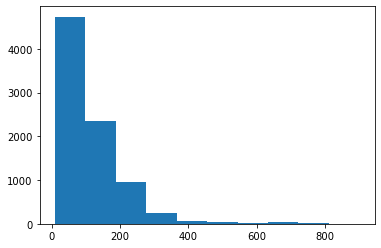

In [166]:
plt.hist(df_agg_f['actual_time']) # it follows a unique distribution as osrm time

(array([1402., 2372., 1392., 1247.,  686.,  426.,  367.,  274.,  213.,
          78.]),
 array([  7. ,  20.7,  34.4,  48.1,  61.8,  75.5,  89.2, 102.9, 116.6,
        130.3, 144. ]),
 <BarContainer object of 10 artists>)

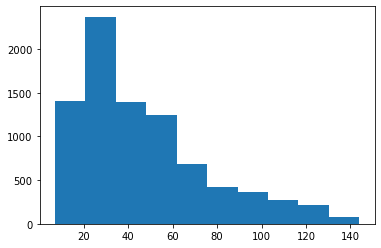

In [168]:
plt.hist(df_agg_f['osrm_time'])

(array([1159., 1982., 1481., 1138.,  985.,  465.,  339.,  332.,  340.,
         236.]),
 array([  7. ,  19.9,  32.8,  45.7,  58.6,  71.5,  84.4,  97.3, 110.2,
        123.1, 136. ]),
 <BarContainer object of 10 artists>)

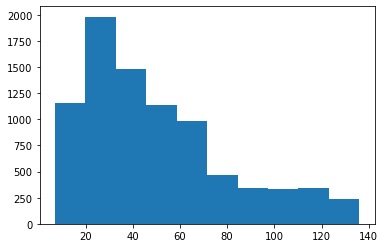

In [170]:
plt.hist(df_agg_f['segment_osrm_time']) 
# OSrm time follow a similar distribution as osrm time, however osrm time has
#little higher peak as compared to segmentosrm time

(array([1784., 2897., 1801.,  950.,  433.,  214.,  128.,  110.,   72.,
          68.]),
 array([ 23.46146667, 113.91273   , 204.36399333, 294.81525667,
        385.26652   , 475.71778333, 566.16904667, 656.62031   ,
        747.07157333, 837.52283667, 927.9741    ]),
 <BarContainer object of 10 artists>)

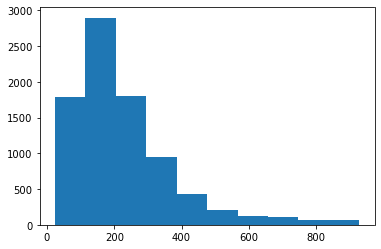

In [171]:
plt.hist(df_agg_f['time_taken'])

(array([3945., 2558.,  823.,  510.,  399.,   70.,   50.,   46.,   50.,
           6.]),
 array([  9.00246144,  77.06869335, 145.13492526, 213.20115717,
        281.26738908, 349.33362098, 417.39985289, 485.4660848 ,
        553.53231671, 621.59854862, 689.66478053]),
 <BarContainer object of 10 artists>)

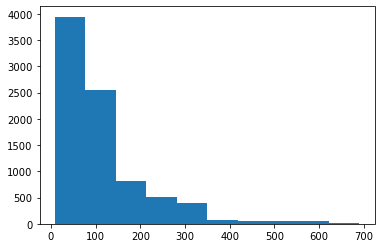

In [172]:
plt.hist(df_agg_f['actual_distance_to_destination'])

(array([2168., 2821., 1162.,  809.,  411.,  331.,  397.,  241.,  105.,
          12.]),
 array([  9.0729 ,  27.27019,  45.46748,  63.66477,  81.86206, 100.05935,
        118.25664, 136.45393, 154.65122, 172.84851, 191.0458 ]),
 <BarContainer object of 10 artists>)

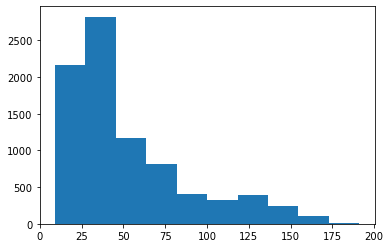

In [173]:
plt.hist(df_agg_f['osrm_distance'])

(array([1762., 2519., 1447.,  873.,  503.,  386.,  325.,  363.,  180.,
          99.]),
 array([  9.0729 ,  26.07436,  43.07582,  60.07728,  77.07874,  94.0802 ,
        111.08166, 128.08312, 145.08458, 162.08604, 179.0875 ]),
 <BarContainer object of 10 artists>)

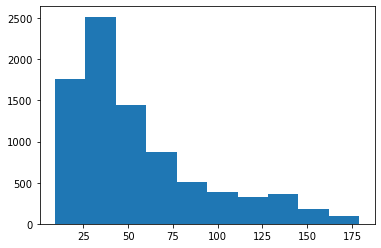

In [175]:
plt.hist(df_agg_f['segment_osrm_distance'])
# Osrm time follow a similar distribution as osrm distance, however osrm distance has
#little higher peak as compared to segment_osrm distance

### Checking Outliers Presence using Visual analysis & then treating it using IQR

In [ ]:

### time_taken

In [ ]:

fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_agg_f['time_taken'])
 
# show plot
plt.show()


In [ ]:
# 3. 
# Outlier Treatment using IQR (not needed but, we can do it) -
print("No. of rows before : ", df_agg_f.shape[0])
q1 = df_agg_f['time_taken'].quantile(0.25)
q3 = df_agg_f['time_taken'].quantile(0.75)
iqr = q3-q1

df_agg_f = df_agg_f[(df_agg_f['time_taken']>(q1-1.5*iqr) ) & (df_agg_f['time_taken']<(q3+1.5*iqr))]

print("No. of rows after : ", df_agg_f.shape[0])

In [150]:
df_agg_f.columns

Index(['trip_uuid', 'Year', 'Month', 'route_type', 'source_center',
       'destination_center', 'source_state', 'source_city',
       'source_place_code', 'destination_state', 'destination_city',
       'destination_place_code', 'actual_time',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'segment_osrm_time', 'segment_osrm_distance', 'time_taken'],
      dtype='object')

In [151]:

### actual_distance_to_destination

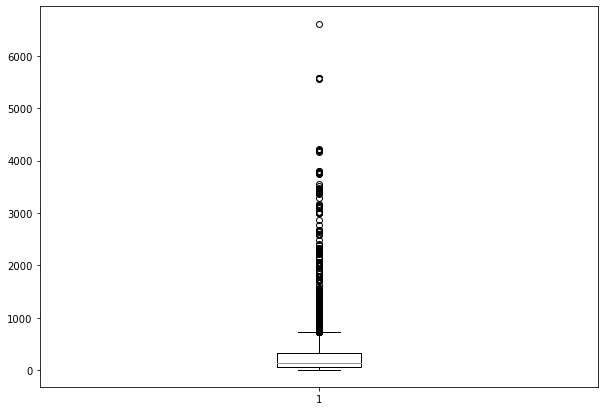

In [152]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_agg_f['actual_distance_to_destination'])
 
# show plot
plt.show()


In [153]:
# 3. 
# Outlier Treatment using IQR (not needed but, we can do it) -
print("No. of rows before : ", df_agg_f.shape[0])
q1 = df_agg_f['actual_distance_to_destination'].quantile(0.25)
q3 = df_agg_f['actual_distance_to_destination'].quantile(0.75)
iqr = q3-q1

df_agg_f = df_agg_f[(df_agg_f['actual_distance_to_destination']>(q1-1.5*iqr) ) & (df_agg_f['actual_distance_to_destination']<(q3+1.5*iqr))]

print("No. of rows after : ", df_agg_f.shape[0])

No. of rows before :  11200
No. of rows after :  10256


In [154]:

### osrm_time

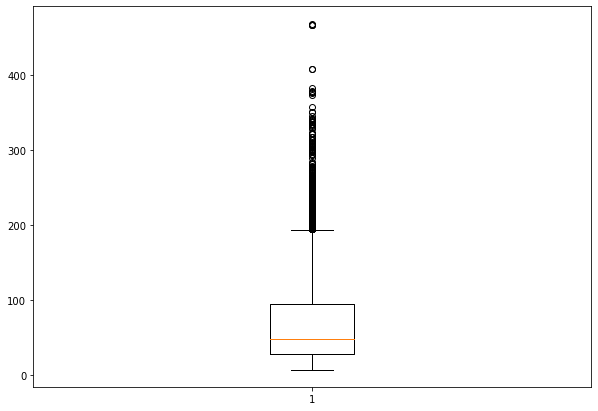

In [155]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_agg_f['osrm_time'])
 
# show plot
plt.show()


In [156]:

# 3. 
# Outlier Treatment using IQR (not needed but, we can do it) -
print("No. of rows before : ", df_agg_f.shape[0])
q1 = df_agg_f['osrm_time'].quantile(0.25)
q3 = df_agg_f['osrm_time'].quantile(0.75)
iqr = q3-q1

df_agg_f = df_agg_f[(df_agg_f['osrm_time']>(q1-1.5*iqr) ) & (df_agg_f['osrm_time']<(q3+1.5*iqr))]

print("No. of rows after : ", df_agg_f.shape[0])

No. of rows before :  10256
No. of rows after :  9785


In [157]:
### osrm_distance


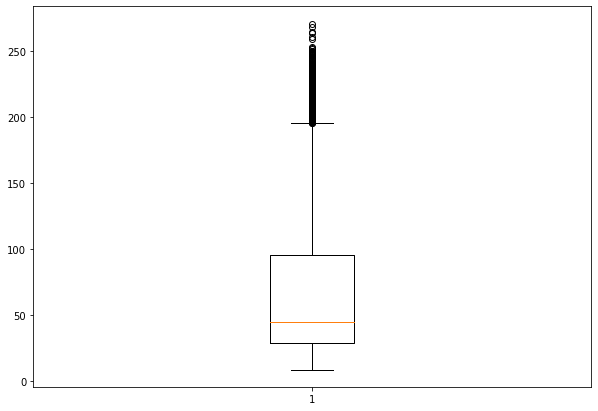

In [158]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_agg_f['osrm_distance'])
 
# show plot
plt.show()

In [159]:
# 3. 
# Outlier Treatment using IQR (not needed but, we can do it) -
print("No. of rows before : ", df_agg_f.shape[0])
q1 = df_agg_f['osrm_distance'].quantile(0.25)
q3 = df_agg_f['osrm_distance'].quantile(0.75)
iqr = q3-q1

df_agg_f = df_agg_f[(df_agg_f['osrm_distance']>(q1-1.5*iqr) ) & (df_agg_f['osrm_distance']<(q3+1.5*iqr))]

print("No. of rows after : ", df_agg_f.shape[0])

No. of rows before :  9785
No. of rows after :  9331


In [160]:

### segment_osrm_distance

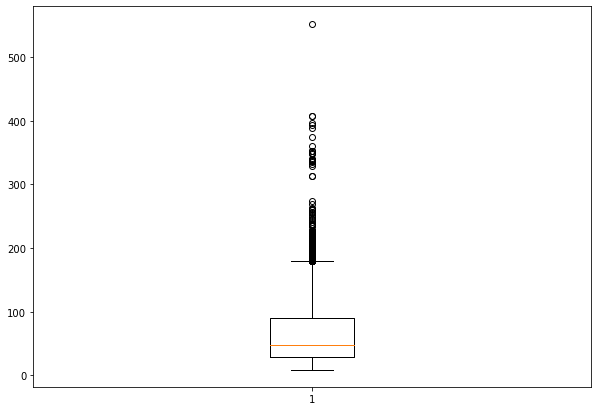

In [161]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_agg_f['segment_osrm_distance'])
 
# show plot
plt.show()


In [162]:
# 3. 
# Outlier Treatment using IQR (not needed but, we can do it) -
print("No. of rows before : ", df_agg_f.shape[0])
q1 = df_agg_f['segment_osrm_distance'].quantile(0.25)
q3 = df_agg_f['segment_osrm_distance'].quantile(0.75)
iqr = q3-q1

df_agg_f = df_agg_f[(df_agg_f['segment_osrm_distance']>(q1-1.5*iqr) ) & (df_agg_f['segment_osrm_distance']<(q3+1.5*iqr))]

print("No. of rows after : ", df_agg_f.shape[0])

No. of rows before :  9331
No. of rows after :  8983


In [163]:

### segment_osrm_time

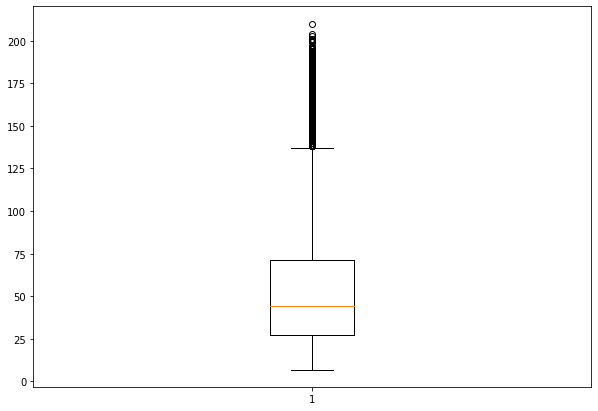

In [164]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_agg_f['segment_osrm_time'])
 
# show plot
plt.show()

In [165]:
# 3. 
# Outlier Treatment using IQR (not needed but, we can do it) -
print("No. of rows before : ", df_agg_f.shape[0])
q1 = df_agg_f['segment_osrm_time'].quantile(0.25)
q3 = df_agg_f['segment_osrm_time'].quantile(0.75)
iqr = q3-q1

df_agg_f = df_agg_f[(df_agg_f['segment_osrm_time']>(q1-1.5*iqr) ) & (df_agg_f['segment_osrm_time']<(q3+1.5*iqr))]

print("No. of rows after : ", df_agg_f.shape[0])

No. of rows before :  8983
No. of rows after :  8457


In [36]:
df_agg_f.columns

Index(['trip_uuid', 'Year', 'Month', 'route_type', 'source_center',
       'destination_center', 'source_state', 'source_city',
       'source_place_code', 'destination_state', 'destination_city',
       'destination_place_code', 'actual_time', 'segment_actual_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination', 'osrm_time',
       'osrm_distance', 'segment_osrm_time', 'segment_osrm_distance',
       'time_taken'],
      dtype='object')

In [37]:
df_agg_f['osrm_distance'].min(),df_agg_f['osrm_distance'].max()

(9.07289999999999, 2840.081)

In [38]:
df_agg_f['segment_osrm_distance'].min(),df_agg_f['segment_osrm_distance'].max()

(9.07289999999999, 3523.6323999999986)

In [39]:
df_agg_f['actual_distance_to_destination'].min(), df_agg_f['actual_distance_to_destination'].max()

(9.00246144174878, 85110.88509258933)

### One Hot Encoding(Categorical Variables)

In [107]:
df_agg_f.columns

Index(['trip_uuid', 'Year', 'Month', 'route_type', 'source_center',
       'destination_center', 'source_state', 'source_city',
       'source_place_code', 'destination_state', 'destination_city',
       'destination_place_code', 'actual_time', 'segment_actual_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination', 'osrm_time',
       'osrm_distance', 'segment_osrm_time', 'segment_osrm_distance',
       'time_taken'],
      dtype='object')

In [119]:
##There are other categorical columns , but these three together can give all the info of rest all extracted columns
cat_col = ['route_type','source_center','destination_center']

In [121]:
df_cat = df_agg_f[cat_col]

In [127]:
df_cat_f = pd.get_dummies(df_cat, columns = cat_col)
df_cat_f.index = df_agg_f['trip_uuid']
df_cat_f = df_cat_f.reset_index()
df_cat_f

,trip_uuid,route_type_Carting,route_type_FTL,source_center_IND000000AAL,source_center_IND000000AAQ,source_center_IND000000ABG,source_center_IND000000ACA,source_center_IND000000ACB,source_center_IND000000ACK,source_center_IND000000ACN,...,destination_center_IND847223AAA,destination_center_IND847404AAB,destination_center_IND848101AAA,destination_center_IND851112AAB,destination_center_IND851127AAA,destination_center_IND851204AAA,destination_center_IND853204AAA,destination_center_IND854105AAB,destination_center_IND854311AAA,destination_center_IND854326AAB
0,trip-153671041653548748,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,trip-153671042288605164,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,trip-153671043369099517,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,trip-153671052974046625,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,trip-153671055416136166,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13540,trip-153861095625827784,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13541,trip-153861104386292051,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13542,trip-153861106442901555,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13543,trip-153861115439069069,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
#Based on hypothesis testing, we can remove segment actual time & start_scan_to_end_scan as they are statistically 
#similar to actual time & time taken respectively hence we are removing these two columns from the model data prep
df_num = df_agg_f[['trip_uuid','Year','Month','actual_time','actual_distance_to_destination','osrm_time'\
                   ,'osrm_distance','segment_osrm_time','segment_osrm_distance',
                  'time_taken']]
df_num

,trip_uuid,Year,Month,actual_time,actual_distance_to_destination,osrm_time,osrm_distance,segment_osrm_time,segment_osrm_distance,time_taken
0,trip-153671041653548748,2018,9,1562,8860.812105,743,991.3523,1008,1320.4733,2260.109800
1,trip-153671042288605164,2018,9,143,240.208306,68,85.1110,65,84.1894,181.611883
2,trip-153671043369099517,2018,9,3347,68163.502238,1741,2372.0852,1941,2545.2678,3934.362517
3,trip-153671052974046625,2018,9,131,63.783978,44,53.5761,44,53.5761,485.792817
4,trip-153671055416136166,2018,9,61,34.407865,23,28.0647,23,28.0647,190.487850
...,...,...,...,...,...,...,...,...,...,...
13540,trip-153861095625827784,2018,10,83,141.057373,62,73.4630,62,64.8551,258.028917
13541,trip-153861104386292051,2018,10,21,25.130640,12,16.0882,11,16.0883,60.590517
13542,trip-153861106442901555,2018,10,282,93.743842,54,63.2841,88,104.8866,422.119867
13543,trip-153861115439069069,2018,10,264,355.281673,184,177.6635,221,223.5324,348.512867


In [137]:
df_agg_final = df_cat_f.merge(df_num, on = ['trip_uuid'], how='left')
df_agg_final

,trip_uuid,route_type_Carting,route_type_FTL,source_center_IND000000AAL,source_center_IND000000AAQ,source_center_IND000000ABG,source_center_IND000000ACA,source_center_IND000000ACB,source_center_IND000000ACK,source_center_IND000000ACN,...,destination_center_IND854326AAB,Year,Month,actual_time,actual_distance_to_destination,osrm_time,osrm_distance,segment_osrm_time,segment_osrm_distance,time_taken
0,trip-153671041653548748,0,1,0,0,0,0,0,0,0,...,0,2018,9,1562,8860.812105,743,991.3523,1008,1320.4733,2260.109800
1,trip-153671042288605164,1,0,0,0,0,0,0,0,0,...,0,2018,9,143,240.208306,68,85.1110,65,84.1894,181.611883
2,trip-153671043369099517,0,1,0,0,0,0,0,0,0,...,0,2018,9,3347,68163.502238,1741,2372.0852,1941,2545.2678,3934.362517
3,trip-153671052974046625,0,1,0,0,0,0,0,0,0,...,0,2018,9,131,63.783978,44,53.5761,44,53.5761,485.792817
4,trip-153671055416136166,1,0,0,0,0,0,0,0,0,...,0,2018,9,61,34.407865,23,28.0647,23,28.0647,190.487850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13540,trip-153861095625827784,1,0,0,0,0,0,0,0,0,...,0,2018,10,83,141.057373,62,73.4630,62,64.8551,258.028917
13541,trip-153861104386292051,1,0,0,0,0,0,0,0,0,...,0,2018,10,21,25.130640,12,16.0882,11,16.0883,60.590517
13542,trip-153861106442901555,1,0,0,0,0,0,0,0,0,...,0,2018,10,282,93.743842,54,63.2841,88,104.8866,422.119867
13543,trip-153861115439069069,1,0,0,0,0,0,0,0,0,...,0,2018,10,264,355.281673,184,177.6635,221,223.5324,348.512867


### Scaling

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
scaler = MinMaxScaler()

In [135]:
##Prepared Data for modeling
scaled_data = scaler.fit_transform(df_agg_final.iloc[:,1:])
scaled_data

array([[0.        , 1.        , 0.        , ..., 0.39171228, 0.37313365,
        0.28401557],
       [1.        , 0.        , 0.        , ..., 0.02306489, 0.02137295,
        0.02008236],
       [0.        , 1.        , 0.        , ..., 0.75645035, 0.72162526,
        0.49661665],
       ...,
       [1.        , 0.        , 0.        , ..., 0.03205629, 0.02726194,
        0.05062271],
       [1.        , 0.        , 0.        , ..., 0.08405004, 0.06102031,
        0.04127589],
       [0.        , 1.        , 0.        , ..., 0.01407349, 0.01236496,
        0.03352502]])

# Insights and Recommendations

#### **EDA based insights -**

1. Total 144,867 rows were present in the data set.
2. No duplicate rows were found.
3. Very few Nulls were found in source name & destiname name, 
   but these columns can be replaced with source & destination center respectively
3. 'actual_time' and 'segment_actual_time' columns were found to be highly correlated. Dropping one of them to avoid multicollinearity.
4. 'start_scan_to_end_scan' and 'time_taken' columns were highly correlated. Dropping one of them to avoid multicollinearity.
5. Outlier values were found in almost all time & distance columns

#### **Insights from hypothesis testing & distribution analysis -**
1. The Time taken between od_start_time and od_end_time and start_scan_to_end_scan are statistically similar
2. The actual_time aggregated value and OSRM time aggregated value are statistically different and follow different distribution
3. The actual_time aggregated value and segment actual time aggregated value are statistically similar
4. The osrm distance aggregated value and segment osrm distance aggregated value are statistically different but follow similar distribution
5. The osrm time aggregated value and segment osrm time aggregated value are statistically different but follow similar distribution


#### **Generic recommendations -**

* Karnataka, Maharsahtra and Haryana are the three top states in terms of logistics movements and hence, more resources should be deployed to these locations 
* In the forecasting model, we can eliminate similar columns as observed in hypothesis testing and correlation check
* Better route planning should be done as we can see actual time taken is roughly three times the osrm time 
* Objective should be to bring the actual distance nearer to osrm distance, by either changing routes or the mode of      transaportation


 
